In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# This is for regression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor

# This is for classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder


from sklearn.metrics import plot_confusion_matrix
from sklearn import tree

plt.style.use("seaborn")

In [2]:
df=pd.read_csv('data/bank-full.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### EDA


In [3]:
df['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

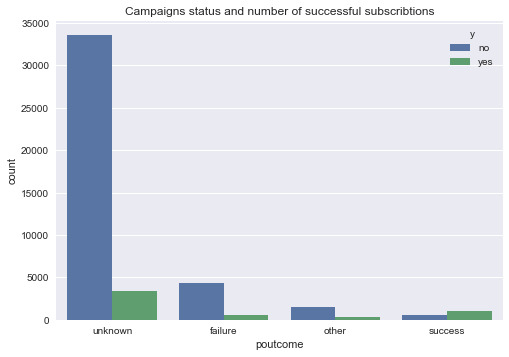

In [4]:
plt.title('Campaigns status and number of successful subscribtions')
sns.countplot(x="poutcome", data=df, hue='y')
plt.show();

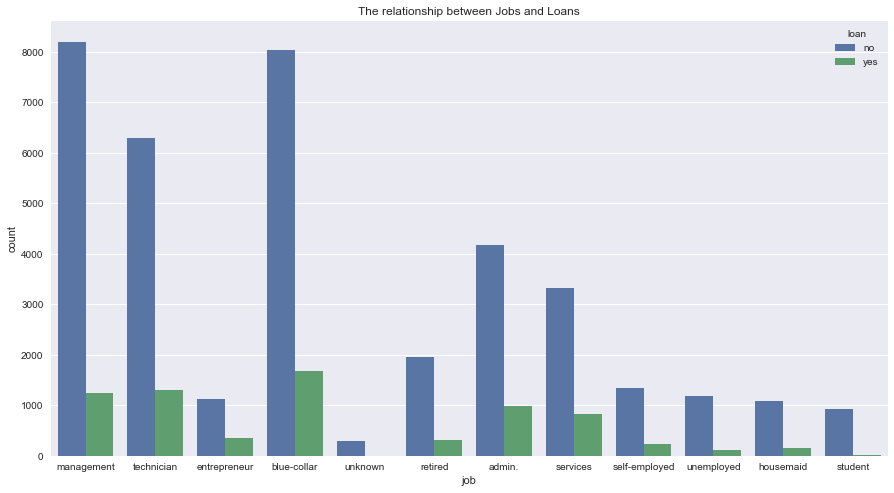

In [6]:
plt.figure(figsize=(15,8))
plt.title('The relationship between Jobs and Loans')
sns.countplot(x="job", hue="loan", data=df)
plt.show();

In [7]:
df.describe(exclude='number')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


### Splitting Data

In [8]:
df['y']= df['y'].map({'yes': 1, 'no': 0})
target = "y"
# delete the target 
features=['job','marital','education','default','housing','loan','contact','month','poutcome']
X = df.drop(target, axis=1)
# assign it here 
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=0.8, 
    random_state=42)


### Feature Engineering

In [10]:
le = LabelEncoder()

In [11]:
for x in features:
    X_train[x] = le.fit_transform(X_train[x])

<ipython-input-11-ca5723ea86bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[x] = le.fit_transform(X_train[x])


In [12]:
for x in features:
    X_test[x] = le.fit_transform(X_test[x])

<ipython-input-12-e8e57a2c5210>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[x] = le.fit_transform(X_test[x])


In [13]:
X_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
3344,41,1,1,0,0,849,1,0,2,15,8,72,1,-1,0,3
17965,49,9,1,0,0,1415,1,0,0,30,5,269,2,-1,0,3
18299,42,0,1,1,0,3842,0,0,0,31,5,130,4,-1,0,3
10221,37,4,2,2,0,-119,1,0,2,11,6,375,11,-1,0,3
32192,56,1,1,0,0,3498,0,0,0,15,0,264,2,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,44,3,2,0,0,1059,0,0,2,18,6,2093,1,-1,0,3
44732,23,8,2,2,0,508,0,0,0,8,11,210,1,92,1,0
38158,34,9,0,2,0,1317,1,0,0,15,8,239,1,-1,0,3
860,33,5,1,1,0,165,0,0,2,7,8,111,1,-1,0,3


In [14]:
X_train.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [15]:
X_train.dtypes

age          int64
job          int32
marital      int32
education    int32
default      int32
balance      int64
housing      int32
loan         int32
contact      int32
day          int64
month        int32
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int32
dtype: object

In [16]:
y_train

3344     0
17965    0
18299    0
10221    0
32192    1
        ..
11284    1
44732    0
38158    0
860      0
15795    0
Name: y, Length: 36168, dtype: int64

### Calculating Baseline Model

In [17]:
y_train.value_counts(normalize=True)



0    0.883931
1    0.116069
Name: y, dtype: float64

In [22]:
# Baseline Model MAE
# Create prediction using the mean for every observation
preds = [0 for x in range(len(y_train))]

accuracy_score(y_true=y_train, y_pred=preds)

0.8839305463393055

### Random Forest Classifier Model

In [19]:
class_forest = RandomForestClassifier(
    n_estimators = 10, # Number of trees
    criterion = 'entropy',
    random_state = 0)

class_forest.fit(X_train, y_train)

preds_class = class_forest.predict(X_test)

In [20]:
val_train = round(class_forest.score(X_train, y_train),2)*100
val_train

99.0

In [21]:
val_test = round(class_forest.score(X_test, y_test),2)*100
val_test

90.0

In [29]:
class_forest.feature_importances_

array([0.09916282, 0.04485824, 0.0219571 , 0.02671231, 0.00186661,
       0.10545088, 0.02726423, 0.01076945, 0.03593558, 0.08516036,
       0.08601013, 0.30703149, 0.03858323, 0.05476637, 0.02032836,
       0.03414284])

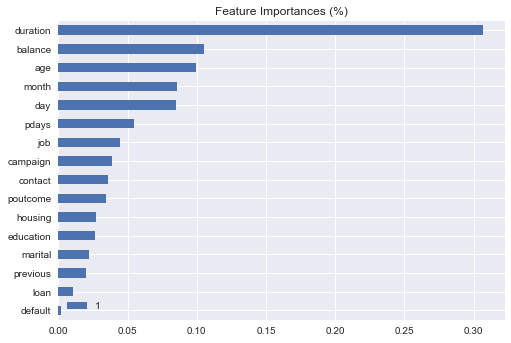

In [30]:
# Plot Feature Importances to Visualize better

pd.DataFrame(dict(zip(X_train.columns, class_forest.feature_importances_)), index = [1])\
.T\
.sort_values(1, ascending=True)\
.plot(kind="barh", title="Feature Importances (%)");

### Grid Search 

In [26]:
# Classification

param_grid = {
    "n_estimators": [100,150,200,250], # how many trees in our forest
    "criterion": ["gini", "entropy"], # what criteria is used to split nodes    
}

grid = GridSearchCV(
    class_forest, # model
    param_grid, # hyperparameter to tune
    cv = 5, # K-fold cross validation
    n_jobs=-1, # use all cores on cpu
    verbose=1 # show output
)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   59.2s finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy',
                                              n_estimators=10, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [100, 150, 200, 250]},
             verbose=1)

In [27]:
grid.best_score_


0.9051371197833357

In [28]:
grid.best_params_


{'criterion': 'entropy', 'n_estimators': 200}